# KO-1
Kulik-Omelyanchuk (KO-1) Theory for a **short dirty weak link** 

Let $l$ be the mean-free path, $L$ be the weak-link length and $\xi_0 = \frac{\hbar v_F}{\pi \Delta(0)}$ be the BCS coherence length. 

In KO-1 theory, we assume $$l \ll L \ll \sqrt{l \xi_0}$$.

Using Usadel equations and these assumptions, we can show,

$$ I_S(\phi) R_N = \frac{2 \Delta}{e} \cos{\phi/2} \sum_{n = 0}^{\infty}\frac{1}{\sqrt{a^2 + (n + 1/2)^2}} \tan^{-1}\left[ \frac{b}{\sqrt{a^2 + (n+1/2)^2}}\right] $$

where $a = \frac{\Delta \cos(\phi/2)}{2 \pi k_B T}$ and $b = \frac{\Delta \sin(\phi/2)}{2\pi k_B T}$. $\Delta$ is itself a function of temperature and is obtained as a solution from a self-consistency condition to the Usadel equations.

The self-consistency condition for the superconducting gap takes the form:
    
$$ -\log(t) = \sum_{n=1}^{\infty} \frac{1}{n + 1/2} - \frac{1}{\sqrt{(\left(n + 1/2 \right)^2 + \frac{x^2}{t^2}}} $$

where $t = \frac{T}{T_c}$ and $x = \frac{\Delta}{2\pi k_B T_c}$

If we denote the RHS as $f(x,t)$, then for a given $t$ solving for $x$ is looking for roots of 

$$ f(x,t) + \log(t) = 0 $$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize

## Solving for Gap as a function of $T$

In [3]:
def f(x,t,N=100):
    '''
        N limits the number of terms in the sum
    '''
    n_vec = np.arange(N)
    res_vec = 1.0/(n_vec + 0.5) - 1.0/np.sqrt((n_vec+0.5)**2 + x**2/t**2)
    return np.sum(res_vec)

In [4]:
t = 0.1
def g(x,t,N=100):
    return f(x,t,N) + np.log(t)

root = scipy.optimize.root(g,args=(t,),x0 = 1/2)
print(root.x)

[0.28078506]


In [5]:
t_vec = np.linspace(0.1,1,250)
x_vec = np.array([scipy.optimize.root(g,args=(t,100),x0 = t/2).x for t in t_vec])

Text(0, 0.5, '$\\frac{\\Delta(T)}{2 \\pi k_B T_c}$')

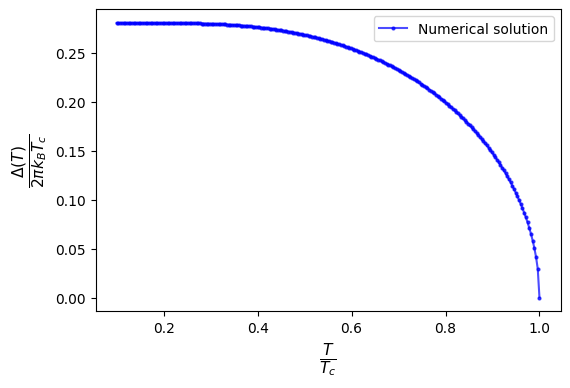

In [7]:
plt.figure(dpi=100)
plt.plot(t_vec,x_vec,label="Numerical solution",color="b",marker="o",alpha=0.7,markersize=2)
plt.legend()
plt.xlabel(r"$\frac{T}{T_c}$",fontsize=16)
plt.ylabel(r"$\frac{\Delta(T)}{2 \pi k_B T_c}$",fontsize=16)

## Current-Phase relationship for fixed T
We can redefine $a$ and $b$ as 
\begin{align*}
a &= \frac{\Delta \cos(\phi/2)}{2 \pi k_B T} = \frac{x \cos(\phi/2)}{t} \\
b &= \frac{\Delta \sin(\phi/2)}{2 \pi k_B T} = \frac{x \sin(\phi/2)}{t} 
\end{align*}

In [49]:
def calc_Is_phi(phi,t,N=1000):
    '''
    N controls number of terms
    '''
    # find delta i.e x
    x = scipy.optimize.root(g,args=(t,),x0 = 1/2).x
    a = (x/t)*np.cos(phi/2)
    b = (x/t)*np.sin(phi/2)
    n_vec = np.arange(N)
    terms = (1.0/np.sqrt(a**2  + (n_vec + 0.5)**2)) * np.arctan(b/np.sqrt(a**2 + (n_vec + 0.5)**2))
    sum_terms = np.sum(terms)
    
    Is = x * np.cos(phi/2)* sum_terms
    # normalization of Is
    
    return Is

Text(0.5, 0, '$\\phi$')

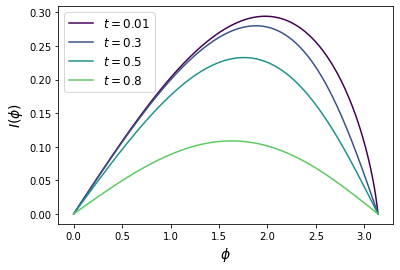

In [64]:
t_vec = [0.01,0.3,0.5,0.8]
colors = plt.get_cmap('viridis',5)
for ind,t in enumerate(t_vec):
    phi_vec = np.linspace(0,np.pi,250) 
    Is_vec = np.array([calc_Is_phi(phi,t) for phi in phi_vec])
    plt.plot(phi_vec,Is_vec,color=colors(ind/len(t_vec)),label=f"$t = ${t}")
plt.legend(fontsize=12)
plt.ylabel(r"$I(\phi)$",fontsize=14)
plt.xlabel(r"$\phi$",fontsize=14)

## Critical current as a function of $T$

In [66]:
t_vec = np.linspace(0.1,1,100)
Ic_vec = np.zeros(len(t_vec))
for ind,t in enumerate(t_vec):
    Is_vec = np.array([calc_Is_phi(phi,t) for phi in phi_vec])
    Ic_vec[ind] = np.max(Is_vec)

Text(0, 0.5, 'Critical current $I_c$')

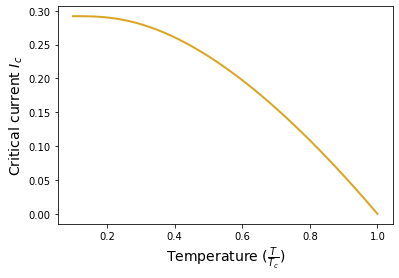

In [68]:
plt.plot(t_vec,Ic_vec,color="goldenrod",linewidth=2)
plt.xlabel(r"Temperature $(\frac{T}{T_c})$", fontsize=14)
plt.ylabel(r"Critical current $I_c$", fontsize=14)